In [ ]:
# -*- coding: utf-8 -*-

"""
Created on Wed Sep 14 12:20:13 2022

@author: bonotto
"""


'''
###############################################################################
###############################################################################
'''
### CLEAR WRKSPACE
def clear_all():
    """Clears all the variables from the workspace of the spyder application."""
    gl = globals().copy()
    for var in gl:
        if var[0] == '_': continue
        if 'func' in str(globals()[var]): continue
        if 'module' in str(globals()[var]): continue

        del globals()[var]
if __name__ == "__main__":
    clear_all()
    # insert here your code

clear_all
'''
###############################################################################
###############################################################################
'''



###############################################################################

import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# Helper libraries
import numpy as np
import pandas as pd
from numpy import matlib as mb
import matplotlib.pyplot as plt
import matplotlib

import scipy.io

# !pip install seaborn
import seaborn as sns
sns.set_style("darkgrid")

# !pip install seaborn

import random

import matplotlib.lines as mlines


# pip install mat4py

# Load the TensorBoard notebook extension.
# %load_ext tensorboard
from datetime import datetime
from packaging import version

# !pip install --upgrade --force-reinstall tensorflow
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# import tensorflow_addons as tfa

# !pip install tensorflow
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import mixed_precision


print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

# import tensorboard
# tensorboard.__version__
# Clear any logs from previous runs
# !rm -rf ./logs/

# C:\Users\bonotto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip'

# !pip install sklearn
# !pip install --upgrade --force-reinstall scikeras


# from scikeras.wrappers import KerasRegressor

from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# from sklearn.externals import joblib
import scipy.interpolate as interp

from sklearn.metrics import r2_score


from mpl_toolkits import mplot3d

import matplotlib.tri as tri
import matplotlib.cm as cm

# !pip install --upgrade --force-reinstall scipy
from scipy import interpolate
from scipy import signal
import scipy.ndimage
import time

try:
  import mat73
except:
  !pip install mat73
  import mat73




Num GPUs Available:  1
TensorFlow version:  2.13.0


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Oct  6 11:40:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# policy = mixed_precision.Policy('float32') # float32, mixed_float16
# mixed_precision.set_global_policy(policy)
# print('Compute dtype: %s' % policy.compute_dtype)
# print('Variable dtype: %s' % policy.variable_dtype)

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00
time: 368 µs (started: 2023-10-06 11:40:55 +00:00)


In [ ]:
train_ds_1 = tf.data.Dataset.load('./gdrive/MyDrive/Colab_Notebooks/tf_Datasets/tf_Dataset_NeuralOpt_all_domain_only_32x32.data')
train_ds_2 = tf.data.Dataset.load('./gdrive/MyDrive/Colab_Notebooks/tf_Datasets/tf_Dataset_NeuralOpt_super_res_only_32x32.data')
# train_ds_1 = tf.data.Dataset.load('./gdrive/MyDrive/Colab_Notebooks/tf_Datasets/tf_Dataset_NeuralOpt_all_domain_only_64x64.data')
# train_ds_2 = tf.data.Dataset.load('./gdrive/MyDrive/Colab_Notebooks/tf_Datasets/tf_Dataset_NeuralOpt_super_res_only_64x64.data')

train_ds = train_ds_1.concatenate(train_ds_2)
train_ds = train_ds.shuffle(42)
# train_ds = train_ds.batch(1024)

x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, Laplace_kernel_ds, Df_dr_kernel_ds = iter(train_ds).next()

print(f'batch size: {x_ds.shape[0]}')

batch size: 512
time: 12.7 s (started: 2023-10-06 11:40:55 +00:00)


In [ ]:
# dict_geo = scipy.io.loadmat('./gdrive/MyDrive/Colab_Notebooks/data_geo_Dataset_NeuralOpt_super_res_64x64.mat')
dict_geo = scipy.io.loadmat('./gdrive/MyDrive/Colab_Notebooks/data_geo_Dataset_NeuralOpt_super_res_32x32.mat')

time: 522 ms (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
# train_ds = tf.data.Dataset.load('./gdrive/MyDrive/Colab_Notebooks/tf_Datasets/tf_Dataset_NeuralOpt_super_res_32x32.data')

# x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, Laplace_kernel_ds, Df_dr_kernel_ds = iter(train_ds).next()

# dict_geo = scipy.io.loadmat('./gdrive/MyDrive/Colab_Notebooks/data_geo_Dataset_NeuralOpt_super_res_32x32.mat')

time: 295 µs (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
train_ds.cardinality().numpy()*x_ds.shape[0]

80896

time: 15.4 ms (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
for x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, Laplace_kernel_ds, Df_dr_kernel_ds in train_ds:
  print(x_ds.shape[0])


512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
64
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
64
512
512
512
512
512
512
512
512
512
time: 3.46 s (started: 2023-10-06 12:37:20 +00:00)


In [ ]:
n_grid = RR_ds.shape[1]
n_output = y_ds.shape[1]
n_input = x_ds.shape[1]

RR_pixels = dict_geo['RR_pixels']
ZZ_pixels = dict_geo['ZZ_pixels']

RHS_i = RHS_in_ds[-1,:,:].numpy()
psi_i = y_ds[-1,:,:].numpy()


time: 27.1 ms (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
def fun_contourf_sol(z,RR,ZZ):
    plt.figure()
    plt.contourf(RR, ZZ, z, 20)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    return


def fun_contour_sol(z,RR,ZZ):
    plt.figure()
    plt.contour(RR, ZZ, z, 20)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    return


def fun_contour_compare_sol(z_ref,z,RR,ZZ):
    l1 = mlines.Line2D([], [], label='DNN')
    l2 = mlines.Line2D([], [], color='black', label='FRIDA')

    plt.figure()
    plt.contour(RR, ZZ, z, 10)
    plt.colorbar()
    plt.contour(RR, ZZ, z_ref, 10, colors = 'black', linestyles = 'dashed')
    plt.legend(handles=[l1, l2])
    plt.axis('equal')
    plt.show()
    return

time: 1.29 ms (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
# try:
#   filename = 'Database_psi_rec_ConvNet_ITER_TensorFlow_v4.mat';
#   mat = mat73.loadmat(filename)
# except:
#   !wget -O Database_psi_rec_ConvNet_ITER_TensorFlow_v4.mat https://www.dropbox.com/scl/fi/qjb681iikwmyzfsc63oa8/Database_psi_rec_ConvNet_ITER_TensorFlow_v4.mat?rlkey=38uwz6kuwt8k5bumpt9cm9jmz&dl=0
#   mat = mat73.loadmat(filename)




time: 270 µs (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
# DB_meas_Bpickup_test_ConvNet        = mat['DB_meas_Bpickup_test_ConvNet']
# DB_psi_pixel_test_ConvNet           = mat['DB_psi_pixel_test_ConvNet']
# DB_res_RHS_pixel_test_ConvNet       = mat['DB_res_RHS_pixel_test_ConvNet']
# DB_Jpla_pixel_test_ConvNet          = mat['DB_Jpla_pixel_test_ConvNet']
# DB_coils_curr_test_ConvNet          = mat['DB_coils_curr_test_ConvNet']
# RR_pixels                           = mat['RR_pixels']
# ZZ_pixels                           = mat['ZZ_pixels']
# DB_separatrix_200_test_ConvNet      = mat['DB_separatrix_200_test_ConvNet']
# XP_YN                               = mat['XP_YN']
# DB_f_test_ConvNet                   = mat['DB_f_test_ConvNet']
# DB_p_test_ConvNet                   = mat['DB_p_test_ConvNet']



# ind_case = 30000
# ind_case = DB_meas_Bpickup_test_ConvNet.shape[0]
# print(str(ind_case))
# # qq = (np.reshape(DB_separatrix_200_test_ConvNet,(DB_separatrix_200_test_ConvNet.shape[0],2,200)))
# # print(DB_separatrix_200_test_ConvNet.shape)
# # separatrix = np.stack((DB_separatrix_200_test_ConvNet[:, :200],
# #                         DB_separatrix_200_test_ConvNet[:, 200:]), axis=-1)


# # qqq = DB_separatrix_200_test_ConvNet[0, 200:]

# DB_meas_Bpickup_test_ConvNet  = DB_meas_Bpickup_test_ConvNet[:ind_case,:]
# DB_psi_pixel_test_ConvNet     = DB_psi_pixel_test_ConvNet[:ind_case,:]
# DB_res_RHS_pixel_test_ConvNet = DB_res_RHS_pixel_test_ConvNet[:ind_case,:]
# DB_Jpla_pixel_test_ConvNet    = DB_Jpla_pixel_test_ConvNet[:ind_case,:]
# DB_coils_curr_test_ConvNet    = DB_coils_curr_test_ConvNet[:ind_case,:]
# DB_f_test_ConvNet             = DB_f_test_ConvNet[:ind_case,:]
# DB_p_test_ConvNet             = DB_p_test_ConvNet[:ind_case,:]


# X_data_load = np.column_stack((DB_meas_Bpickup_test_ConvNet,
#                                DB_coils_curr_test_ConvNet,
#                               #  DB_f_test_ConvNet,
#                                DB_p_test_ConvNet
#                                ))

# y_data_load = DB_psi_pixel_test_ConvNet
# res_RHS_pixel_data_load = DB_res_RHS_pixel_test_ConvNet

# n_dim = y_data_load.shape[1]

time: 544 µs (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
# for i in range(0,1):
#     ind_plot = np.random.randint(0,DB_Jpla_pixel_test_ConvNet.shape[0],1)[0]
#     fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
#     img = axs[0].contour(RR_pixels,ZZ_pixels,DB_psi_pixel_test_ConvNet[ind_plot,:,:],15)
#     axs[0].axis('equal')
#     fig.colorbar(img)
#     img = axs[1].contourf(RR_pixels,ZZ_pixels,DB_Jpla_pixel_test_ConvNet[ind_plot,:,:],15)
#     axs[1].axis('equal')
#     fig.colorbar(img)




time: 227 µs (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
# X_data = X_data_load
# y_data = y_data_load



# ### selec a portion of all the available equilibria
# # ind_subsample = np.random.randint(0,X_data.shape[0],15000)
# ind_subsample = np.random.randint(0,X_data.shape[0],X_data.shape[0])
# ind_subsample = np.arange(0,X_data.shape[0])
# # ind_subsample = np.arange(0,30000)
# # ind_subsample = np.random.randint(0,X_data.shape[0],1000)

# ind_probes = np.arange(0,X_data.shape[1])

# X = X_data[ind_subsample,:]
# y = y_data[ind_subsample,:,:]

# res_RHS_pixel = res_RHS_pixel_data_load[ind_subsample,:,:]
# res_RHS_D = DB_res_RHS_pixel_test_ConvNet[ind_subsample,:]



# ### Standardize input data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# np.mean(X[:,0])



# ### Train-test split
# ID = np.arange(X.shape[0])
# X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
#     X,
#     y,
#     ID,
#     test_size=.2,
#     random_state=42)




# res_RHS_pixel_train = res_RHS_pixel[np.int_(id_train),:,:]
# res_RHS_D_train = res_RHS_D[np.int_(id_train),:]

# res_RHS_pixel_test = res_RHS_pixel[np.int_(id_test),:,:]
# res_RHS_D_test = res_RHS_D[np.int_(id_test),:]


# ### Print some info
# print('N sample train ->', X_train.shape[0])
# print('N sample test  ->', X_test.shape[0])

# n_output = y_train.shape[1]
# n_input = X_train.shape[1]

# print('data_X_train.shape =', X_train.shape)
# print('data_y_train.shape =', y_train.shape)


# # Convert input to tensor

# DTYPE = 'float64'
# DTYPE = 'float32'
# X_train = tf.convert_to_tensor(X_train, dtype=(DTYPE))
# y_train = tf.convert_to_tensor(y_train, dtype=(DTYPE))
# X_test = tf.convert_to_tensor(X_test, dtype=(DTYPE))
# y_test = tf.convert_to_tensor(y_test, dtype=(DTYPE))

# res_RHS_D_train = tf.convert_to_tensor(res_RHS_D_train, dtype=(DTYPE))
# res_RHS_pixel_train = tf.convert_to_tensor(res_RHS_pixel_train, dtype=(DTYPE))

time: 272 µs (started: 2023-10-06 11:41:08 +00:00)


In [ ]:
'''
###############################################################################
### Physics-Informed Neural Operator
'''
DTYPE = 'float32'

from keras import backend as K

def swish(x, beta=1.0):
    return x * K.sigmoid(beta * x)

from keras.layers import Layer
class Swish(Layer):

    def __init__(self, beta=1.0, trainable=False, **kwargs):
        super(Swish, self).__init__(**kwargs)
        self.supports_masking = True
        self.beta = beta
        self.trainable = trainable

    def build(self, input_shape):
        self.beta_factor = K.variable(self.beta,
                                      dtype=K.floatx(),
                                      name='beta_factor')
        if self.trainable:
            self._trainable_weights.append(self.beta_factor)

        super(Swish, self).build(input_shape)

    def call(self, inputs, mask=None):
        return swish(inputs, self.beta_factor)

    def get_config(self):
        config = {'beta': self.get_weights()[0] if self.trainable else self.beta,
                  'trainable': self.trainable}
        base_config = super(Swish, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

# from tensorflow.keras.utils.generic_utils import get_custom_objects
# get_custom_objects().update({'swish': Activation(swish)})


def conv2D_Norm_activation(x,filters,kernel_size,activation='swish'):
    x = layers.Conv2D(filters=filters ,
                      kernel_size=kernel_size,
                      strides=1,
                      padding='same',
                      dtype = DTYPE)(x)
    x = layers.BatchNormalization()(x)
    # x = tf.keras.activations.relu(x)
    # x = tf.keras.activations.tanh(x) if activation == 'tanh' else tf.keras.activations.swish(x)
    # x = tf.keras.activations.tanh(x) if activation == 'tanh' else tf.keras.activations.swish(x)
    x = Swish(beta=1.0, trainable=True)(x)
    return x


def conv2D_Norm_activation(x,filters,kernel_size,activation='swish'):
    x = layers.Conv2D(filters=filters ,
                      kernel_size=kernel_size,
                      strides=1,
                      padding='same',
                      # activation='silu',
                      dtype = DTYPE)(x)
    x = Swish(beta=1.0, trainable=True)(x)
    # x = tf.keras.activations.tanh(x) if activation == 'tanh' else tf.keras.activations.swish(x)
    return x




def PlaNet_Equil_Neural_Opt():
    input_shape_fun = n_input
    input_query_r = n_grid
    input_query_z = n_grid
    neuron_FC = 2048
    n_w = 8 if n_grid == 64 else 4
    n_h = 8 if n_grid == 64 else 4
    n_c = int(neuron_FC/(n_h*n_w))
    interpolation = 'nearest'
    interpolation = 'bilinear'

    input_fun = tf.keras.Input(shape=(input_shape_fun,), name='function') # meas + active currents (+ profiles)
    input_query_RR = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='R_grid_query') # input coordinates (query pts)
    input_query_ZZ = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='Z_grid_query') # input coordinates (query pts)

    inputs = [input_fun, input_query_RR, input_query_ZZ]

    # Branch net
    x = layers.Dense(256,
                    #  activation=tf.keras.activations.get('silu'),
                    #  kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(input_fun)
    x = Swish(beta=1.0, trainable=True)(x)

    x = layers.Dense(128,
                    #  activation=tf.keras.activations.get('silu'),
                    #  kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(x)
    x = Swish(beta=1.0, trainable=True)(x)

    x = layers.Dense(64,
                    #  activation=tf.keras.activations.get('silu'),
                    #  kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(x)
    out_branch = Swish(beta=1.0, trainable=True)(x)

    # out_branch = layers.Dense(64,
    #                  activation=tf.keras.activations.get('silu'),
    #                  kernel_initializer='he_normal',
    #                 #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
    #                  dtype = DTYPE)(x)


    # Trunk net
    # x_r = input_query_RR
    x_r = layers.BatchNormalization()(input_query_RR)
    for i in range(3):
        # x_r = input_query_RR if i == 0 else x_r
        x_r = conv2D_Norm_activation(x_r,filters=(i+1)*8,kernel_size=(3, 3))
        x_r = layers.MaxPooling2D(pool_size=(2,2))(x_r)

    # x_z = input_query_ZZ
    x_z = layers.BatchNormalization()(input_query_ZZ)
    for i in range(3):
        # x_z = input_query_ZZ if i == 0 else x_z
        x_z = conv2D_Norm_activation(x_z,filters=(i+1)*8,kernel_size=(3, 3))
        x_z = layers.MaxPooling2D(pool_size=(2,2))(x_z)

    out_trunk = layers.Concatenate()([x_r,x_z])
    out_trunk = layers.Flatten()(out_trunk)
    out_trunk = layers.Dense(128,
                    #  activation=tf.keras.activations.get('silu'),
                    #  kernel_initializer='he_normal',
                     dtype = DTYPE)(out_trunk)
    out_trunk = Swish(beta=1.0, trainable=True)(out_trunk)

    # for i in range(2):
    #     out_trunk = layers.Dense(128,
    #                  activation=tf.keras.activations.get('gelu'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(out_trunk)

    # x_r = layers.Flatten()(input_query_RR)
    # x_r = layers.BatchNormalization()(x_r)
    # for i in range(3):
    #     x_r = layers.Dense(64,
    #                  activation=tf.keras.activations.get('tanh'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(x_r)

    # x_z = layers.Flatten()(input_query_ZZ)
    # x_z = layers.BatchNormalization()(x_z)
    # for i in range(3):
    #     x_z = layers.Dense(64,
    #                  activation=tf.keras.activations.get('tanh'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(x_z)

    # out_trunk = layers.Concatenate()([x_r,x_z])

    for i in range(2):
      out_trunk = layers.Dense(64,
                    #  activation=tf.keras.activations.get('silu'),
                    #  kernel_initializer='he_normal',
                     dtype = DTYPE)(out_trunk)
      out_trunk = Swish(beta=1.0, trainable=True)(out_trunk)


    # Multiply layer
    out_multiply = layers.Multiply(name='Multiply')([out_branch,out_trunk])


    # conv2d-based decoder
    x_dec = layers.Dense(neuron_FC,
                    #  activation=tf.keras.activations.get('silu'),
                    #  kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(out_multiply)
    x_dec = Swish(beta=1.0, trainable=True)(x_dec)

    x_dec = layers.Reshape(target_shape=(n_w, n_h, n_c))(x_dec)

    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=32,kernel_size=(3, 3))


    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=16,kernel_size=(3, 3))


    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=8,kernel_size=(3, 3))

    out_grid = layers.Conv2D(filters=1,
                      kernel_size=(1, 1),
                      strides=1,
                      padding='same',
                      activation='linear',
                      kernel_initializer='he_normal',
                      bias_initializer='zeros',
                      dtype = DTYPE)(x_dec)


    outputs = out_grid

    # x = layers.Resizing(height = y_train.shape[1],width = y_train.shape[2],dtype = DTYPE)(x)
    # outputs = x

    model = tf.keras.Model(
        inputs=inputs,
        outputs=outputs,)
    model.compile(optimizer='adam',
                  loss='mse',
                  run_eagerly=False)

    return model

model = PlaNet_Equil_Neural_Opt()
model.summary()
model.save('PlaNet_Equil_Neural_Opt_enc_dec.keras')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 R_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 Z_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 1)            4         ['R_grid_query[0][0]']        
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_1 (Bat  (None, 32, 32, 1)            4         ['Z_grid_query[0][0]']    

In [ ]:
# '''
# ###############################################################################
# ### Physics-Informed Neural Operator
# '''
# DTYPE = 'float32'

# def conv2D_Norm_activation(x,filters,kernel_size,activation='gelu'):
#     x = layers.Conv2D(filters=filters ,
#                       kernel_size=kernel_size,
#                       strides=1,
#                       padding='same',
#                       dtype = DTYPE)(x)
#     x = layers.BatchNormalization()(x)
#     # x = tf.keras.activations.relu(x)
#     x = tf.keras.activations.tanh(x) if activation == 'tanh' else tf.keras.activations.gelu(x)
#     return x

# def transposed_conv2D_Norm_activation(x,filters,kernel_size,activation='gelu'):
#     x = layers.Conv2DTranspose(filters=filters ,
#                       kernel_size=kernel_size,
#                       strides=2,
#                       padding='same',
#                       dtype = DTYPE)(x)
#     x = layers.BatchNormalization()(x)
#     # x = tf.keras.activations.relu(x)
#     x = tf.keras.activations.tanh(x) if activation == 'tanh' else tf.keras.activations.gelu(x)
#     return x



# def PlaNet_Equil_Neural_Opt():
#     input_shape_fun = n_input
#     input_query_r = 32
#     input_query_z = 32
#     neuron_FC = 2048
#     n_w = 8 if n_grid == 64 else 4
#     n_h = 8 if n_grid == 64 else 4
#     n_c = int(neuron_FC/(n_h*n_w))
#     interpolation = 'nearest'
#     interpolation = 'bilinear'

#     input_fun = tf.keras.Input(shape=(input_shape_fun,), name='function') # meas + active currents (+ profiles)
#     input_query_RR = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='R_grid_query') # input coordinates (query pts)
#     input_query_ZZ = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='Z_grid_query') # input coordinates (query pts)

#     inputs = [input_fun, input_query_RR, input_query_ZZ]

#     # Branch net
#     x = layers.Dense(128,
#                      activation=tf.keras.activations.get('swish'),
#                      kernel_initializer='he_normal',
#                     #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
#                      dtype = DTYPE)(input_fun)

#     x = layers.Dense(128,
#                      activation=tf.keras.activations.get('swish'),
#                      kernel_initializer='he_normal',
#                     #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
#                      dtype = DTYPE)(x)

#     out_branch = layers.Dense(128,
#                      activation=tf.keras.activations.get('swish'),
#                      kernel_initializer='he_normal',
#                     #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
#                      dtype = DTYPE)(x)


#     # Trunk net
#     # x_r = input_query_RR
#     x_r = layers.BatchNormalization()(input_query_RR)
#     for i in range(1):
#         # x_r = input_query_RR if i == 0 else x_r
#         x_r = conv2D_Norm_activation(x_r,filters=i+1,kernel_size=(3, 3))
#         x_r = layers.MaxPooling2D(pool_size=(2,2))(x_r)

#     # x_z = input_query_ZZ
#     x_z = layers.BatchNormalization()(input_query_ZZ)
#     for i in range(1):
#         # x_z = input_query_ZZ if i == 0 else x_z
#         x_z = conv2D_Norm_activation(x_z,filters=i+1,kernel_size=(3, 3))
#         x_z = layers.MaxPooling2D(pool_size=(2,2))(x_z)

#     out_trunk = layers.Concatenate()([x_r,x_z])
#     out_trunk = layers.Flatten()(out_trunk)
#     out_trunk = layers.Dense(128,
#                      activation=tf.keras.activations.get('gelu'),
#                      kernel_initializer='he_normal',
#                      dtype = DTYPE)(out_trunk)

#     # for i in range(2):
#     #     out_trunk = layers.Dense(128,
#     #                  activation=tf.keras.activations.get('gelu'),
#     #                  kernel_initializer='he_normal',
#     #                  dtype = DTYPE)(out_trunk)

#     # x_r = layers.Flatten()(input_query_RR)
#     # x_r = layers.BatchNormalization()(x_r)
#     # for i in range(3):
#     #     x_r = layers.Dense(64,
#     #                  activation=tf.keras.activations.get('tanh'),
#     #                  kernel_initializer='he_normal',
#     #                  dtype = DTYPE)(x_r)

#     # x_z = layers.Flatten()(input_query_ZZ)
#     # x_z = layers.BatchNormalization()(x_z)
#     # for i in range(3):
#     #     x_z = layers.Dense(64,
#     #                  activation=tf.keras.activations.get('tanh'),
#     #                  kernel_initializer='he_normal',
#     #                  dtype = DTYPE)(x_z)

#     # out_trunk = layers.Concatenate()([x_r,x_z])

#     for i in range(3):
#         out_trunk = layers.Dense(128,
#                      activation=tf.keras.activations.get('gelu'),
#                      kernel_initializer='he_normal',
#                      dtype = DTYPE)(out_trunk)


#     # Multiply layer
#     out_multiply = layers.Multiply(name='Multiply')([out_branch,out_trunk])


#     # conv2d-based decoder
#     x_dec = layers.Dense(neuron_FC,
#                      activation=tf.keras.activations.get('gelu'),
#                      kernel_initializer='he_normal',
#                     #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
#                      dtype = DTYPE)(out_multiply)

#     x_dec = layers.Reshape(target_shape=(n_w, n_h, n_c))(x_dec)

#     # x_dec = layers.UpSampling2D(size = (2,2),
#     #                         interpolation = interpolation)(x_dec)
#     x_dec = transposed_conv2D_Norm_activation(x_dec,filters=32,kernel_size=(2, 2),activation='tanh')


#     # x_dec = layers.UpSampling2D(size = (2,2),
#     #                         interpolation = interpolation)(x_dec)
#     x_dec = transposed_conv2D_Norm_activation(x_dec,filters=16,kernel_size=(2, 2),activation='tanh')


#     # x_dec = layers.UpSampling2D(size = (2,2),
#     #                         interpolation = interpolation)(x_dec)
#     x_dec = transposed_conv2D_Norm_activation(x_dec,filters=8,kernel_size=(2, 2),activation='tanh')

#     x_dec = layers.Conv2D(filters=1,
#                       kernel_size=(1, 1),
#                       strides=1,
#                       padding='same',
#                       activation='tanh',
#                       kernel_initializer='he_normal',
#                       bias_initializer='zeros',
#                       dtype = DTYPE)(x_dec)

#     out_grid = layers.Conv2D(filters=1,
#                       kernel_size=(1, 1),
#                       strides=1,
#                       padding='same',
#                       activation='linear',
#                       kernel_initializer='he_normal',
#                       bias_initializer='zeros',
#                       dtype = DTYPE)(x_dec)


#     outputs = out_grid

#     # x = layers.Resizing(height = y_train.shape[1],width = y_train.shape[2],dtype = DTYPE)(x)
#     # outputs = x

#     model = tf.keras.Model(
#         inputs=inputs,
#         outputs=outputs,)
#     model.compile(optimizer='adam',
#                   loss='mse',
#                   run_eagerly=False)

#     return model

# model = PlaNet_Equil_Neural_Opt()
# model.summary()
# model.save('PlaNet_Equil_Neural_Opt.keras')


time: 476 µs (started: 2023-10-06 11:41:10 +00:00)


In [ ]:
# for x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, Laplace_kernel_ds, Df_dr_kernel_ds in train_ds:
#   pass

x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, Laplace_kernel_ds, Df_dr_kernel_ds = iter(train_ds).next()

time: 853 ms (started: 2023-10-06 11:41:10 +00:00)


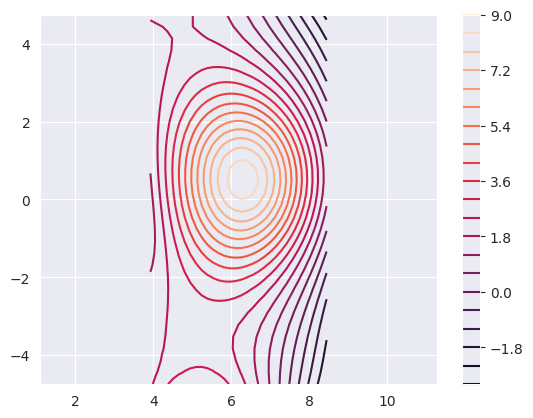

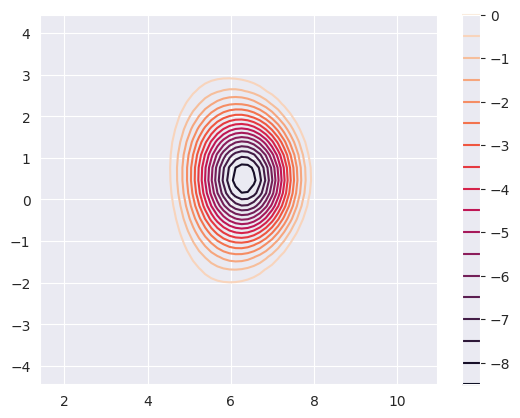

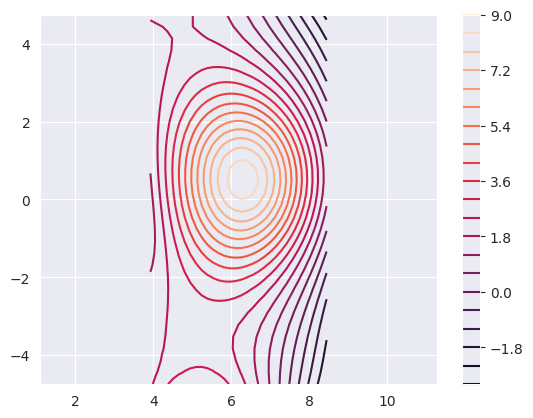

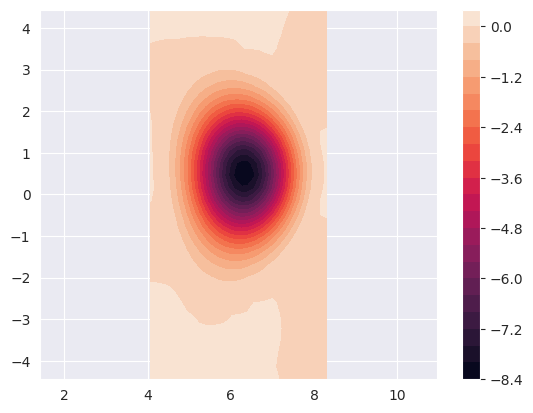

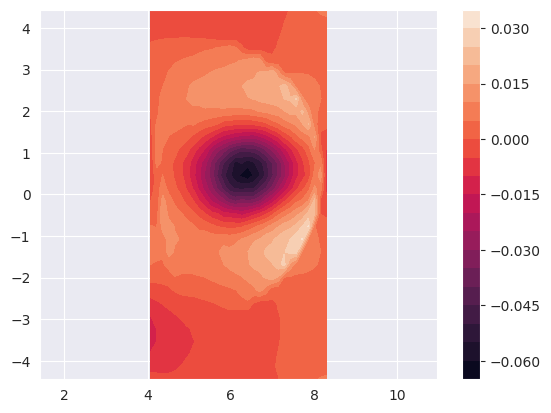

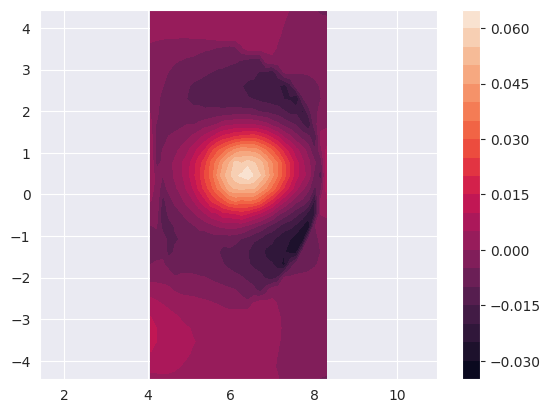

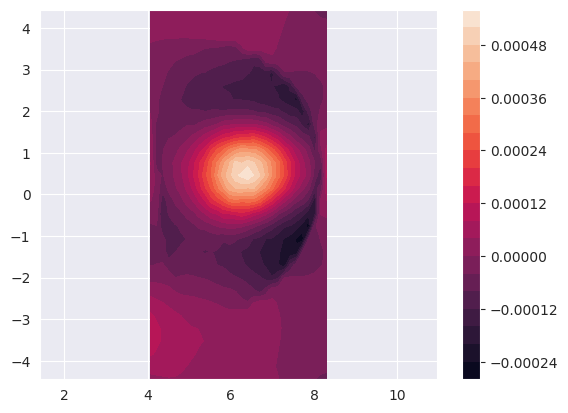

time: 3.35 s (started: 2023-10-06 11:41:11 +00:00)


In [ ]:
'''
###############################################################################
PINN convolutional model - Jacobi iteration
'''

psi_i = y_ds[-1,:,:]
RHS_i = RHS_in_ds[-1,:,:]
RR_pixels = RR_ds[-1,:,:]
ZZ_pixels = ZZ_ds[-1,:,:]



hr = RR_pixels[1,2] - RR_pixels[1,1];
hz = ZZ_pixels[2,1] - ZZ_pixels[1,1];

RR_in = RR_pixels[1:-1,1:-1]
ZZ_in = ZZ_pixels[1:-1,1:-1]

mu0 = 4*np.pi*1e-7


# fun_contourf_sol(jphi_i,RR_pixels,ZZ_pixels)
fun_contour_sol(psi_i,RR_pixels,ZZ_pixels)
fun_contour_sol(RHS_i,RR_in,ZZ_in)
fun_contour_sol(psi_i,RR_pixels,ZZ_pixels)


### compute RHS via comvolution
kr = np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0]))*hz**2;
kz = np.transpose(np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0])))*hr**2;
Laplace_kernel = (kr + kz)/(hr**2*hz**2);

Df_dr_kernel = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr);

Lpsi = signal.convolve2d(psi_i, Laplace_kernel, mode='valid')
# Lpsi = Lpsi/(hr**2*hz**2)
Dpsi_dr = signal.convolve2d(psi_i, Df_dr_kernel, mode='valid')
# LHS_conv = Lpsi - Dpsi_dr/RR_in
GS_ope = Lpsi - Dpsi_dr/RR_in

jphi = -GS_ope/(mu0*RR_in)


fun_contourf_sol(GS_ope,RR_in,ZZ_in)
fun_contourf_sol(RHS_i-GS_ope,RR_in,ZZ_in)
# fun_contourf_sol(jphi_i[1:-1,1:-1]-jphi,RR_in,ZZ_in)



### Test jacobi iteration via convolution
kr = np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0]))*hz**2;
kz = np.transpose(np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0])))*hr**2;

alfa = -2*(hr**2 + hz**2)
Laplace_kernel = np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 1, hz**2/alfa], [0, hr**2/alfa, 0]));
Df_dr_kernel = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2);

Lpsi = signal.convolve2d(psi_i, Laplace_kernel, mode='valid')
Dpsi_dr = signal.convolve2d(psi_i, Df_dr_kernel, mode='valid')

GS_ope = Lpsi - Dpsi_dr/RR_in
GS_ope = GS_ope*alfa/(hr**2*hz**2)

bb = RHS_i/alfa*(hr**2*hz**2)

fun_contourf_sol(GS_ope - RHS_i,RR_in,ZZ_in)

jphi_test = -GS_ope/(mu0*RR_in)
# fun_contourf_sol(jphi_i[1:-1,1:-1]-jphi_test,RR_in,ZZ_in)



### Convolution operators for jacobi iteration
kr = np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0]))*hz**2;
kz = np.transpose(np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0])))*hr**2;

alfa = -2*(hr**2 + hz**2)
Jacobi_kernel_1 = -np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 0, hz**2/alfa], [0, hr**2/alfa, 0]));
Jacobi_kernel_2 = -np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2);

Lpsi = signal.convolve2d(psi_i, Jacobi_kernel_1, mode='valid')
Dpsi_dr = signal.convolve2d(psi_i, Jacobi_kernel_2, mode='valid')

qq = Lpsi - Dpsi_dr/RR_in + RHS_i/alfa*(hr**2*hz**2)


fun_contourf_sol(qq - psi_i[1:-1,1:-1],RR_in,ZZ_in)


### Using TF convolution (tf.nn.conv2d)
# train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train,res_RHS_pixel_train[:,1:-1,1:-1])).batch(64)

# for x_ds, y_ds, RHS_in_ds in train_ds:
#     qqq = 0



RR_conv_tensor = tf.convert_to_tensor(RR_pixels, dtype=(DTYPE))
RR_in_conv_tensor = tf.convert_to_tensor(RR_in, dtype=(DTYPE))

Jacobi_kernel_1 = tf.convert_to_tensor(Jacobi_kernel_1, dtype=(DTYPE))
Jacobi_kernel_2 = tf.convert_to_tensor(Jacobi_kernel_2, dtype=(DTYPE))
Jacobi_kernel_1_tensor = tf.expand_dims(tf.expand_dims(Jacobi_kernel_1[::-1, ::-1],axis = -1),axis = -1)
Jacobi_kernel_2_tensor = tf.expand_dims(tf.expand_dims(Jacobi_kernel_2[::-1, ::-1],axis = -1),axis = -1)

Laplace_kernel = tf.convert_to_tensor(Laplace_kernel, dtype=(DTYPE))
Df_dr_kernel = tf.convert_to_tensor(Df_dr_kernel, dtype=(DTYPE))
Laplace_kernel_tensor = tf.expand_dims(tf.expand_dims(Laplace_kernel[::-1, ::-1],axis = -1),axis = -1)
Df_dr_kernel_tensor = tf.expand_dims(tf.expand_dims(Df_dr_kernel[::-1, ::-1],axis = -1),axis = -1)

RR_conv_tensor = tf.expand_dims(tf.expand_dims(RR_conv_tensor,axis = 0),axis = -1)
RR_in_conv_tensor = tf.expand_dims(tf.expand_dims(RR_in_conv_tensor,axis = 0),axis = -1)


Gaussian_kernel = np.array(([1,2,1], [2,4,2], [1,2,1]), dtype=DTYPE)/(16);
# Gaussian_kernel = np.array(([1,4,7,4,1],
#                             [4,16,26,16,4],
#                             [7,26,41,26,7],
#                             [4,16,26,16,4],
#                             [1,4,7,4,1]), dtype=DTYPE)/(273);
Gauss_tensor = tf.expand_dims(tf.expand_dims(Gaussian_kernel[::-1, ::-1],axis = -1),axis = -1)



def fun_GS_Jacobi_conv_batch(f,RHS_in_ds):
    # Compute GS operator via convolution
    temp_1 = tf.nn.conv2d(f,Jacobi_kernel_1_tensor,strides=[1, 1, 1, 1],padding='VALID')
    temp_2 = tf.nn.conv2d(f,Jacobi_kernel_2_tensor,strides=[1, 1, 1, 1],padding='VALID')
    temp_2 = tf.math.divide(temp_2,RR_in_conv_tensor)

    psi_conv = temp_1[:,:,:,0] - temp_2[:,:,:,0] + RHS_in_ds/alfa*(hr**2*hz**2)

    return psi_conv


def fun_GSoperator_NN_conv_batch(f):
    # Compute GS operator via convolution
    Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.nn.conv2d(f,Df_dr_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in_conv_tensor)

    GS_ope = Lpsi[:,:,:,0] - Dpsi_dr[:,:,:,0]
    GS_ope = GS_ope*alfa/(hr**2*hz**2)

    return GS_ope


def fun_GSoperator_NN_conv_smooth_batch(f):
    # Compute GS operator via convolution
    Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.nn.conv2d(f,Df_dr_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in_conv_tensor)

    GS_ope = Lpsi - Dpsi_dr
    GS_ope = GS_ope*alfa/(hr**2*hz**2)

    GS_ope = tf.nn.conv2d(GS_ope,Gauss_tensor,strides=[1, 1, 1, 1],padding='SAME')
    GS_ope = tf.squeeze(GS_ope,axis = -1)

    return GS_ope


def fun_GSoperator_conv_batch(f):
    # Compute GS operator via convolution
    Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.nn.conv2d(f,Df_dr_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in_conv_tensor)

    GS_ope = Lpsi[:,:,:,0] - Dpsi_dr[:,:,:,0]
    GS_ope = GS_ope*alfa/(hr**2*hz**2)
    jphi = -GS_ope/(mu0*RR_in)

    return GS_ope, jphi


# Compute GS operator via convolution
# f = tf.expand_dims(y_ds,axis = -1)
# temp_1 = tf.nn.conv2d(f,Jacobi_kernel_1_tensor,strides=[1, 1, 1, 1],padding='VALID')
# temp_2 = tf.nn.conv2d(f,Jacobi_kernel_2_tensor,strides=[1, 1, 1, 1],padding='VALID')
# temp_2 = tf.math.divide(temp_2,RR_in_conv_tensor)

# psi_i_conv = temp_1[:,:,:,0] + temp_2[:,:,:,0] + RHS_in_ds

# psi_i_conv = temp_1[:,:,:,0] - temp_2[:,:,:,0] + RHS_in_ds/alfa*(hr**2*hz**2)


# fun_contourf_sol(psi_i_conv[0,:,:] - f[0,1:-1,1:-1,0],RR_in,ZZ_in)



In [ ]:
Laplace_kernel

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.        , -0.09257769,  0.        ],
       [-0.4074223 ,  1.        , -0.4074223 ],
       [ 0.        , -0.09257769,  0.        ]], dtype=float32)>

time: 9.75 ms (started: 2023-10-06 11:41:14 +00:00)


In [ ]:
batch_size = y_ds.shape[0]

time: 424 µs (started: 2023-10-06 11:41:14 +00:00)


In [ ]:
# f = tf.expand_dims(y_ds,axis=-1)
# f = tf.transpose(f,[3,1,2,0])
# # f.shape
# # L_ker = tf.expand_dims(Laplace_kernel_ds, axis=-1)
# # L_ker = tf.transpose(tf.expand_dims(Laplace_kernel_ds, axis=-1), [1,2,0,3])
# # L_ker.shape
# # Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
# # Lpsi = tf.nn.depthwise_conv2d(f,L_ker,strides=[1, 1, 1, 1],padding='VALID').shape
# Lpsi = tf.nn.depthwise_conv2d(
#     f,
#     tf.transpose(tf.expand_dims(Laplace_kernel_ds, axis=-1), [1,2,0,3]),
#     strides=[1, 1, 1, 1],
#     padding='VALID')
# Lpsi = tf.transpose(Lpsi,[3,1,2,0]) # no need to be transposed becaused Laplacian filter is left/rigth symmetric
# Dpsi_dr = tf.nn.depthwise_conv2d(
#     f,
#     tf.transpose(tf.expand_dims(Df_dr_kernel_ds, axis=-1), [1,2,0,3]),
#     strides=[1, 1, 1, 1],
#     padding='VALID')
# Dpsi_dr = - Dpsi_dr # necessary because nn.depthwise_conv2d filters has to be transposed to perform real convolution (here [+h 0 -h] -> [-h 0 +h])
# Dpsi_dr = tf.transpose(Dpsi_dr,[3,1,2,0])
# RR_in = tf.expand_dims(RR_unscal_ds[:,1:-1,1:-1],axis=-1)
# Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in)

# GS_ope = Lpsi - Dpsi_dr


# hr = RR_unscal_ds[:,1,2] - RR_unscal_ds[:,1,1];
# hz = ZZ_unscal_ds[:,2,1] - ZZ_unscal_ds[:,1,1];
# alfa = -2*(hr**2 + hz**2)

# hr = tf.expand_dims(tf.expand_dims(tf.expand_dims(hr,axis=-1),axis=-1),axis=-1)
# hz = tf.expand_dims(tf.expand_dims(tf.expand_dims(hz,axis=-1),axis=-1),axis=-1)
# alfa = tf.expand_dims(tf.expand_dims(tf.expand_dims(alfa,axis=-1),axis=-1),axis=-1)

# GS_ope = GS_ope*alfa/(hr**2*hz**2)
# # GS_ope[0,:10,0]

# GS_ope = tf.nn.conv2d(GS_ope,Gauss_tensor,strides=[1, 1, 1, 1],padding='SAME')
# GS_ope = tf.squeeze(GS_ope,axis = -1)
# GS_ope[0,:10,0]


time: 258 µs (started: 2023-10-06 11:41:14 +00:00)


2


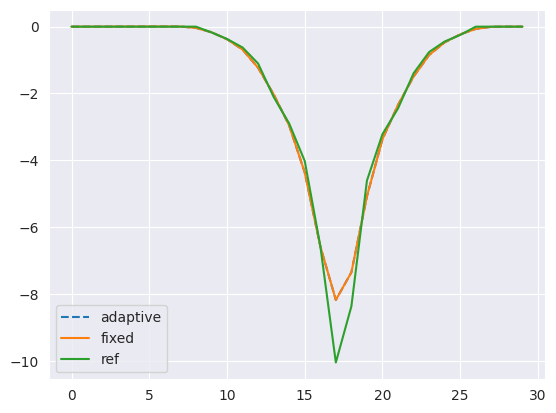

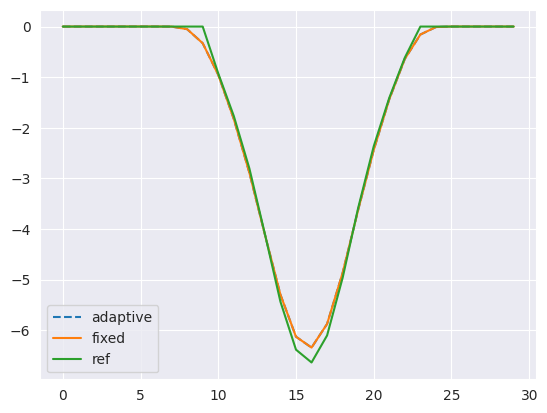

time: 13.1 s (started: 2023-10-06 11:41:14 +00:00)


In [ ]:
def fun_GSoperator_NN_conv_smooth_batch_adaptive(
    f,
    Laplace_kernel_ds,
    Df_dr_kernel_ds,
    RR_ds,
    ZZ_ds):

  f = tf.transpose(f,[3,1,2,0])
  Lpsi = tf.nn.depthwise_conv2d(
      f,
      tf.transpose(tf.expand_dims(Laplace_kernel_ds, axis=-1), [1,2,0,3]),
      strides=[1, 1, 1, 1],
      padding='VALID')
  Lpsi = tf.transpose(Lpsi,[3,1,2,0]) # no need to be transposed becaused Laplacian filter is left/rigth symmetric
  Dpsi_dr = tf.nn.depthwise_conv2d(
      f,
      tf.transpose(tf.expand_dims(Df_dr_kernel_ds, axis=-1), [1,2,0,3]),
      strides=[1, 1, 1, 1],
      padding='VALID')
  Dpsi_dr = - Dpsi_dr # necessary because nn.depthwise_conv2d filters has to be transposed to perform real convolution (here [+h 0 -h] -> [-h 0 +h])
  Dpsi_dr = tf.transpose(Dpsi_dr,[3,1,2,0])
  RR_in = tf.expand_dims(RR_ds[:,1:-1,1:-1],axis=-1)
  Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in)

  GS_ope = Lpsi - Dpsi_dr

  hr = RR_ds[:,1,2] - RR_ds[:,1,1];
  hz = ZZ_ds[:,2,1] - ZZ_ds[:,1,1];
  alfa = -2*(hr**2 + hz**2)

  hr = tf.expand_dims(tf.expand_dims(tf.expand_dims(hr,axis=-1),axis=-1),axis=-1)
  hz = tf.expand_dims(tf.expand_dims(tf.expand_dims(hz,axis=-1),axis=-1),axis=-1)
  alfa = tf.expand_dims(tf.expand_dims(tf.expand_dims(alfa,axis=-1),axis=-1),axis=-1)

  GS_ope = GS_ope*alfa/(hr**2*hz**2)
  # GS_ope[0,:10,0]

  GS_ope = tf.nn.conv2d(GS_ope,Gauss_tensor,strides=[1, 1, 1, 1],padding='SAME')
  GS_ope = tf.squeeze(GS_ope,axis = -1)

  # GS_ope_padded = RHS_ds.numpy()
  # GS_ope_padded[:,1:-1,1:-1] = GS_ope
  # GS_ope = tf.constant(GS_ope_padded)
  return GS_ope


###
x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, Laplace_kernel_ds, Df_dr_kernel_ds = iter(train_ds).next()

for i, items in enumerate(train_ds):
  if i == 2:
    x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, Laplace_kernel_ds, Df_dr_kernel_ds = items
    print(i)
    break

f = tf.expand_dims(y_ds,axis=-1)
GS_ope_adaptive = fun_GSoperator_NN_conv_smooth_batch_adaptive(
  f,
  Laplace_kernel_ds,
  Df_dr_kernel_ds,
  RR_ds,
  ZZ_ds)

GS_ope_fixed = fun_GSoperator_NN_conv_smooth_batch(
  f)

for i in range(2):
  ind = int(np.random.randint(0,y_ds.shape[0],1))

  plt.figure()
  plt.plot(GS_ope_adaptive[ind,:30,16], label='adaptive',linestyle='dashed')
  plt.plot(GS_ope_fixed[ind,:30,16], label='fixed')
  plt.plot(RHS_in_ds[ind,:30,16], label='ref')
  plt.legend()
  plt.show()


In [ ]:
def loss_fun_PDE_adaptive(
      predictions,
      RHS_in_ds,
      Laplace_kernel_ds,
      Df_dr_kernel_ds,
      RR_ds,
      ZZ_ds):
    GS_ope_ref = RHS_in_ds
    GS_ope_ds = fun_GSoperator_NN_conv_smooth_batch_adaptive(
        predictions,
        Laplace_kernel_ds,
        Df_dr_kernel_ds,
        RR_ds,
        ZZ_ds)
    loss_PDE = tf.reduce_mean(tf.square(GS_ope_ref - GS_ope_ds))
    return .1*loss_PDE, GS_ope_ds

f = tf.expand_dims(y_ds,axis=-1)
loss_PDE, GS_ope_ds = loss_fun_PDE_adaptive(
      f,
      RHS_in_ds,
      Laplace_kernel_ds,
      Df_dr_kernel_ds,
      RR_ds,
      ZZ_ds)

print(loss_PDE.numpy())


# GS_ope_adaptive = fun_GSoperator_NN_conv_smooth_batch_adaptive(
#   f,
#   Laplace_kernel_ds,
#   Df_dr_kernel_ds,
#   RR_ds,
#   ZZ_ds)

# for i in range(2):
#   ind = int(np.random.randint(0,y_ds.shape[0],1))
#   plt.figure()
#   plt.plot(GS_ope_adaptive[ind,:30,16], label='adaptive',linestyle='dashed')
#   plt.plot(GS_ope_fixed[ind,:30,16], label='fixed')
#   plt.plot(RHS_in_ds[ind,:30,16], label='ref')
#   plt.legend()
#   plt.show()

# for i in range(2):
#   plt.figure()
#   plt.plot(GS_ope_adaptive[i,:30,16], label='adaptive',linestyle='dashed')
#   plt.plot(RHS_in_ds[i,:30,16], label='ref')
#   plt.legend()
#   plt.show()


0.0055610393
time: 49.6 ms (started: 2023-10-06 11:41:27 +00:00)


In [ ]:
# f = tf.expand_dims(y_ds,axis=-1)
# # hr = RR_pixels[1,2] - RR_pixels[1,1];
# # hz = ZZ_pixels[2,1] - ZZ_pixels[1,1];

# # alfa = -2*(hr**2 + hz**2)
# # Laplace_kernel = np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 1, hz**2/alfa], [0, hr**2/alfa, 0]));
# # Df_dr_kernel = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2);

# # Compute GS operator via convolution
# Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
# Dpsi_dr = tf.nn.conv2d(f,Df_dr_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
# Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in_conv_tensor)

# GS_ope = Lpsi - Dpsi_dr

# # RR_in_conv_tensor

# GS_ope = GS_ope*alfa/(hr**2*hz**2)

# GS_ope = tf.nn.conv2d(GS_ope,Gauss_tensor,strides=[1, 1, 1, 1],padding='SAME')
# GS_ope = tf.squeeze(GS_ope,axis = -1)

# print(GS_ope[-1,:30,16])
# print(RHS_in_ds[-1,:30,16])

time: 293 µs (started: 2023-10-06 11:41:27 +00:00)


time: 21.2 ms (started: 2023-10-06 11:41:27 +00:00)


In [ ]:
model = PlaNet_Equil_Neural_Opt()
learning_rate_MSE  = 1
learning_rate_Grad = 1
learning_rate_PDE  = 1


def loss_fun_MSE(y_ds, predictions):
    loss_MSE = tf.reduce_mean(tf.square(y_ds - tf.squeeze(predictions)))
    return loss_MSE

def loss_fun_PDE(y_ds,predictions,RHS_in_ds):
    GS_ope_ref = RHS_in_ds
    GS_ope_ds = fun_GSoperator_NN_conv_smooth_batch(predictions)
    loss_PDE = tf.reduce_mean(tf.square(GS_ope_ref - GS_ope_ds))
    return loss_PDE

def loss_fun_PDE_lazy(y_ds,predictions):
    GS_ope_ref = fun_GSoperator_NN_conv_smooth_batch(tf.expand_dims(y_ds,axis=-1))
    GS_ope_ds = fun_GSoperator_NN_conv_smooth_batch(predictions)
    loss_PDE = tf.reduce_mean(tf.square(GS_ope_ref - GS_ope_ds))
    return loss_PDE

def loss_fun_PDE_adaptive(
      predictions,
      RHS_in_ds,
      Laplace_kernel_ds,
      Df_dr_kernel_ds,
      RR_ds,
      ZZ_ds):
    GS_ope_ref = RHS_in_ds
    GS_ope_ds = fun_GSoperator_NN_conv_smooth_batch_adaptive(
        predictions,
        Laplace_kernel_ds,
        Df_dr_kernel_ds,
        RR_ds,
        ZZ_ds)
    loss_PDE = tf.reduce_mean(tf.square(GS_ope_ref - GS_ope_ds))
    return .1*loss_PDE


# def loss_fun_PDE_Jacobi(y_ds,predictions,RHS_in_ds):
#     psi_ref = y_ds[:,1:-1,1:-1]
#     psi_conv = fun_GS_Jacobi_conv_batch(predictions,RHS_in_ds)

#     loss_PDE = tf.reduce_mean(tf.square(psi_ref - psi_conv))
#     return loss_PDE


def loss_fun_all(
      y_ds,
      predictions,
      RHS_in_ds,
      RR_ds,
      ZZ_ds,
      Laplace_kernel_ds,
      Df_dr_kernel_ds,
      learning_rate_PDE=1,
      learning_rate_Grad=1):
    loss_MSE = loss_fun_MSE(y_ds, predictions)
    loss_PDE = loss_fun_PDE_adaptive(
        predictions,
        RHS_in_ds,
        Laplace_kernel_ds,
        Df_dr_kernel_ds,
        RR_ds,
        ZZ_ds)
    # loss_PDE = loss_fun_PDE(y_ds,predictions,RHS_in_ds)
    return loss_MSE + loss_PDE

def fun_initialize_history(model,X_train,y_train,res_RHS_pixel_train):
    history = []
    RHS_in = res_RHS_pixel_train[:,1:-1,1:-1]
    predictions = tf.convert_to_tensor(model.predict(X_train))
    loss_0 = tf.reduce_mean(loss_fun_MSE(y_train, predictions) +
                            loss_fun_PDE(y_train, predictions,RHS_in))
    history.append(loss_0)
    return history

history = []

time: 928 ms (started: 2023-10-06 11:41:27 +00:00)


In [ ]:
opt = tf.keras.optimizers.Adam(0.001)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
if y_ds.shape[1] == 64:
  manager = tf.train.CheckpointManager(ckpt, './gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts', max_to_keep=4)
else:
  manager = tf.train.CheckpointManager(ckpt, './gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts', max_to_keep=4)

time: 603 ms (started: 2023-10-06 11:41:28 +00:00)


In [ ]:
# The following training loop creates an instance of the model and of an optimizer,
# then gathers them into a tf.train.Checkpoint object. It calls the training step
# in a loop on each batch of data, and periodically writes checkpoints to disk.

def train_and_checkpoint(net, manager):
  ckpt.restore(manager.latest_checkpoint)
  if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
  else:
    print("Initializing from scratch.")

time: 650 µs (started: 2023-10-06 11:41:29 +00:00)


In [ ]:
policy = mixed_precision.Policy('float32') # float32, mixed_float16
mixed_precision.set_global_policy(policy)

time: 543 µs (started: 2023-10-06 11:41:29 +00:00)


In [ ]:
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

Compute dtype: float32
Variable dtype: float32
time: 592 µs (started: 2023-10-06 11:41:29 +00:00)


In [ ]:
import os
os.getcwd()

'/content'

time: 8.06 ms (started: 2023-10-06 11:41:29 +00:00)


In [ ]:
train_and_checkpoint(model, manager)

Restored from ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts/ckpt-41
time: 1.15 s (started: 2023-10-06 11:41:29 +00:00)


In [ ]:
preds = model([x_ds, RR_ds, ZZ_ds])

time: 822 ms (started: 2023-10-06 11:41:30 +00:00)


In [ ]:
@tf.function
def train_step(
      x_ds,
      y_ds,
      RHS_in_ds,
      RR_ds,
      ZZ_ds,
      Laplace_kernel_ds,
      Df_dr_kernel_ds,
      learning_rate_PDE=1,
      learning_rate_Grad=1):

    with tf.GradientTape() as tape:
        predictions = model([x_ds,RR_ds,ZZ_ds])
        loss = loss_fun_all(
            y_ds,
            predictions,
            RHS_in_ds,
            RR_ds,
            ZZ_ds,
            Laplace_kernel_ds,
            Df_dr_kernel_ds,
            learning_rate_PDE,
            learning_rate_Grad)

    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss


print_every_epoch = 25
epochs = 500
optimizer = tf.keras.optimizers.Adam() # poor performances
optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
# optimizer = tf.keras.optimizers.Adam(learning_rate=.0005)

for i in range(4):
    training_time_start = time.time()
    for epoch in range(epochs):
        t_start = time.time()
        loss_epoch = []
        for x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, L_ker_ds, Df_ker_ds in train_ds:
          loss = train_step(
              x_ds,
              y_ds,
              RHS_in_ds,
              RR_ds,
              ZZ_ds,
              L_ker_ds,
              Df_ker_ds,
              learning_rate_PDE,
              learning_rate_Grad)

          loss_epoch.append(loss)

        loss = np.mean(np.asarray(loss_epoch))
        epoch_time = time.time() - t_start

        history.append(loss)
        ckpt.step.assign_add(1)
        if epoch % print_every_epoch == 0:
            print('epoch {:d}, of {:d}, loss = {:2.2e}, {:d}s/epoch'.format(
                epoch+1,
                epochs,
                loss,
                int(epoch_time)))
            preds = model([x_ds, RR_ds, ZZ_ds])
            print(loss_fun_MSE(y_ds, preds).numpy(),
                  loss_fun_PDE_adaptive(
                    preds,
                    RHS_in_ds,
                    L_ker_ds,
                    Df_ker_ds,
                    RR_ds,
                    ZZ_ds).numpy())

            save_path = manager.save()
            print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))

    total_training_time = time.time() - training_time_start
    print('')
    print('--> Total training time {:d}s'.format(int(total_training_time)))
    print('')
    print('')

    dictionary = {'history': history}
    history_name = ('/content/gdrive/MyDrive/history_PlaNet_NeuralOp_test_{:d}epochs.h5'.format(len(history)))
    model_name = ('/content/gdrive/MyDrive/model_PlaNet_NeuralOp_test_{:d}epochs.h5'.format(len(history)))
    scipy.io.savemat(history_name,dictionary)
    model.save(model_name)

plt.figure()
plt.plot(np.arange(0,len(history)),history, marker = '.')
plt.yscale('log')

model.save('/content/gdrive/MyDrive/tmp_model.h5')


# epoch 1, of 500, loss = 1.42e+01, 13s/epoch
# 0.3648378 1.1415585
# Saved checkpoint for step 2: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-1
# epoch 26, of 500, loss = 1.58e-01, 4s/epoch
# 0.07248607 0.19958995
# Saved checkpoint for step 27: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-2
# epoch 51, of 500, loss = 1.14e-01, 4s/epoch
# 0.012043751 0.11577696
# Saved checkpoint for step 52: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-3
# epoch 76, of 500, loss = 9.00e-02, 3s/epoch
# 0.0127792405 0.08654188
# Saved checkpoint for step 77: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-4
# epoch 101, of 500, loss = 7.02e-02, 3s/epoch
# 0.00786194 0.05310843
# Saved checkpoint for step 102: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-5



# epoch 1, of 500, loss = 4.73e+01, 11s/epoch
# 11.365862 7.8826523
# Saved checkpoint for step 2: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-1
# epoch 26, of 500, loss = 6.27e-01, 2s/epoch
# 0.061712265 0.30335236
# Saved checkpoint for step 27: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-2
# epoch 51, of 500, loss = 4.35e-01, 2s/epoch
# 0.043101393 0.2168537
# Saved checkpoint for step 52: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-3
# epoch 76, of 500, loss = 4.07e-01, 2s/epoch
# 0.036104128 0.17540175
# Saved checkpoint for step 77: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-4
# epoch 101, of 500, loss = 2.98e-01, 2s/epoch
# 0.027818972 0.1357151
# Saved checkpoint for step 102: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-5
# epoch 126, of 500, loss = 2.06e-01, 2s/epoch
# 0.016419534 0.11762528
# Saved checkpoint for step 127: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-6
# epoch 151, of 500, loss = 2.25e-01, 2s/epoch
# 0.025274852 0.19537431
# Saved checkpoint for step 152: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-7
# epoch 176, of 500, loss = 1.65e-01, 2s/epoch
# 0.013111498 0.088000245
# Saved checkpoint for step 177: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-8
# epoch 201, of 500, loss = 1.57e-01, 2s/epoch
# 0.010936339 0.081946276
# Saved checkpoint for step 202: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-9
# epoch 226, of 500, loss = 1.48e-01, 2s/epoch
# 0.009656801 0.060959302
# Saved checkpoint for step 227: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-10
# epoch 251, of 500, loss = 1.54e-01, 2s/epoch
# 0.014265344 0.07356716
# Saved checkpoint for step 252: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-11
# epoch 276, of 500, loss = 1.53e-01, 2s/epoch
# 0.011259005 0.05969313
# Saved checkpoint for step 277: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-12
# epoch 301, of 500, loss = 1.31e-01, 2s/epoch
# 0.010336004 0.054968853
# Saved checkpoint for step 302: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-13
# epoch 326, of 500, loss = 1.02e-01, 2s/epoch
# 0.0069089187 0.04764879
# Saved checkpoint for step 327: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-14
# epoch 351, of 500, loss = 1.03e-01, 2s/epoch
# 0.006970071 0.04349452
# Saved checkpoint for step 352: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-15
# epoch 376, of 500, loss = 9.01e-02, 2s/epoch
# 0.0061923265 0.040268008
# Saved checkpoint for step 377: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-16
# epoch 401, of 500, loss = 1.05e-01, 2s/epoch
# 0.0073651318 0.050021354
# Saved checkpoint for step 402: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-17
# epoch 426, of 500, loss = 1.08e-01, 3s/epoch
# 0.016275171 0.040023834
# Saved checkpoint for step 427: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-18
# epoch 451, of 500, loss = 1.10e-01, 2s/epoch
# 0.008178522 0.054131597
# Saved checkpoint for step 452: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-19
# epoch 476, of 500, loss = 7.83e-02, 2s/epoch
# 0.005333393 0.042099796
# Saved checkpoint for step 477: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_test_ckpts/ckpt-20

# --> Total training time 1186s

epoch 1, of 500, loss = 4.88e-02, 34s/epoch
0.0023506307 0.008912089
Saved checkpoint for step 1003: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts/ckpt-42
epoch 26, of 500, loss = 4.55e-02, 5s/epoch
0.005852862 0.005218348
Saved checkpoint for step 1028: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts/ckpt-43
epoch 51, of 500, loss = 7.76e-03, 5s/epoch
0.0016519167 0.007060481
Saved checkpoint for step 1053: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts/ckpt-44
epoch 76, of 500, loss = 3.58e-02, 6s/epoch
0.0028991092 0.00873388
Saved checkpoint for step 1078: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts/ckpt-45
epoch 101, of 500, loss = 8.97e-03, 6s/epoch
0.0019974248 0.007434769
Saved checkpoint for step 1103: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts/ckpt-46
epoch 126, of 500, loss = 1.72e+00, 6s/epoch
1.2505124 1.1354401
Saved checkpoint for step 1128: ./gdrive/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch 1, of 500, loss = 1.60e-02, 6s/epoch
0.0021369844 0.0074287043
Saved checkpoint for step 1503: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_enc_dec_32x32_test_ckpts/ckpt-62


KeyboardInterrupt: ignored

time: 52min 39s (started: 2023-10-06 11:41:31 +00:00)


In [ ]:
dictionary = {'history': history}
scipy.io.savemat('/content/gdrive/MyDrive/history_PlaNet_NeuralOp_enc_dec_32x32',dictionary)
model.save('/content/gdrive/MyDrive/model_PlaNet_NeuralOp_enc_dec_32x32.h5')
model.save_weights('/content/gdrive/MyDrive/model_PlaNet_NeuralOp_enc_dec_32x32')

time: 866 ms (started: 2023-10-06 12:45:36 +00:00)


In [ ]:
x# from google.colab import drive
# drive.mount('/content/gdrive')
# model.save('/content/gdrive/MyDrive/PlaNet_equlibrium_onlypla_scaled_smooth.h5')
# model.save('PlaNet_equlibrium_onlypla_scaled_smooth.h5')

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
dictionary = {'history': history}
scipy.io.savemat('/content/gdrive/MyDrive/history_PlaNet_Equil_kin_65588sample',dictionary)
model.save('/content/gdrive/MyDrive/model_PlaNet_Equil_kin_65588sample.h5')

# tmp_scaler = {'scaler':scaler}
# import pickle
# pickle.dump(tmp_scaler, open('/content/gdrive/MyDrive/tmp_scaler','wb'))

dictionary = {'X_train': X_train.numpy(),
              'y_train': y_train.numpy(),
              'X_test': X_test.numpy(),
              'y_test': y_test.numpy(),
              'id_train': id_train,
              'id_test': id_test}
# scipy.io.savemat('/content/gdrive/MyDrive/data_PlaNet_Equil_kin_65588sample',dictionary)





In [ ]:


# from google.colab import files
# files.download('/content/gdrive/MyDrive/history_PlaNet_Equil_65588sample_2500epochs')
# files.download('/content/gdrive/MyDrive/model_PlaNet_Equil_65588sample_2500epochs.h5')
# files.download('/content/gdrive/MyDrive/tmp_scaler')
# files.download('/content/gdrive/MyDrive/tmp_data')


In [ ]:
plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')
plt.xlim([-200,6000])
plt.ylim([.001,30
])

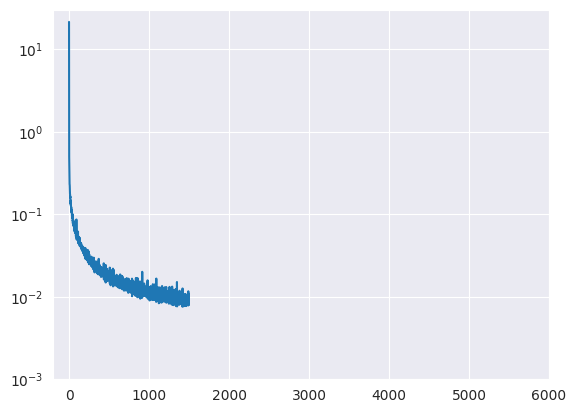

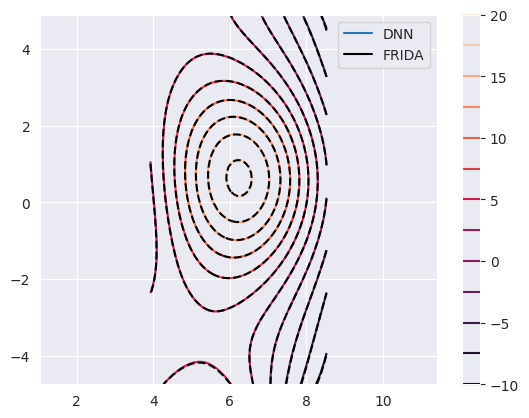

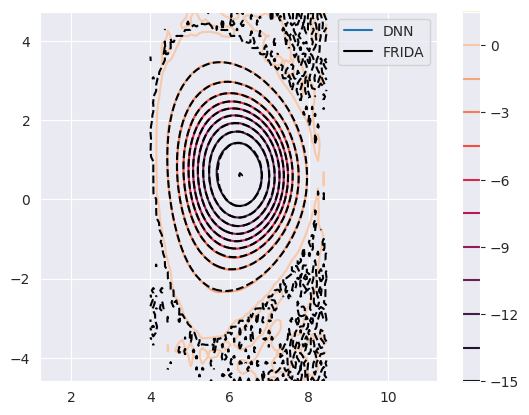

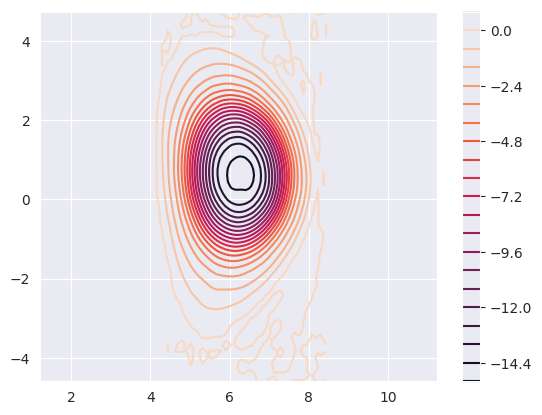

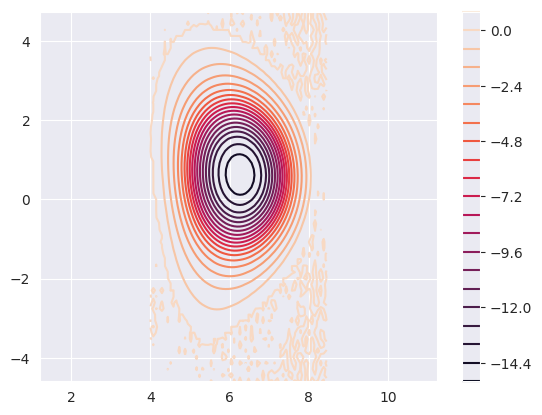

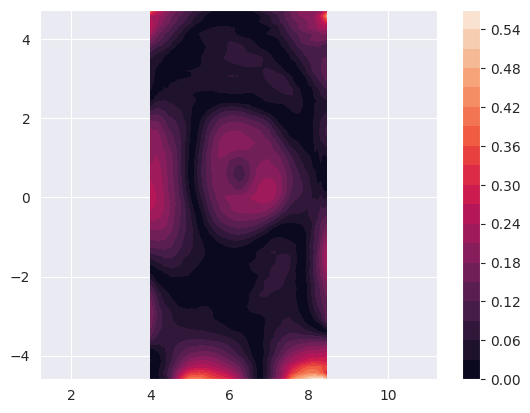

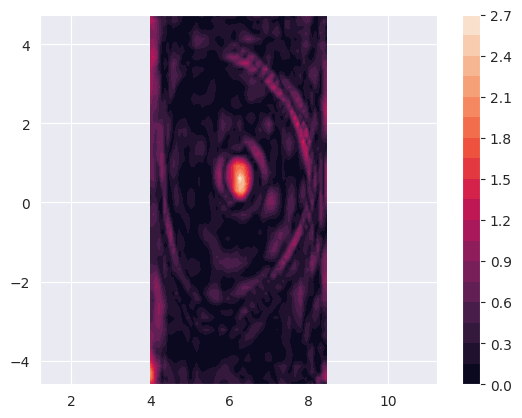

time: 2.33 s (started: 2023-09-01 23:18:13 +00:00)


In [ ]:
plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')
plt.xlim([-200,6000])
plt.ylim([.001,30
])

history_bkp = history

ind_plot = 2900
qq_ref = y_train[ind_plot,:,:].numpy()
qq_NN = np.squeeze(model(X_train[ind_plot:ind_plot+1,:]).numpy())
RHS_ref = res_RHS_pixel_train[ind_plot,:,:].numpy()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# sur1 = ax.contour(RR_pixels,ZZ_pixels, qq_ref, 10, cmap=cm.coolwarm,
#                         linewidth=0, antialiased=False)
# surf2 = ax.contour(RR_pixels,ZZ_pixels, qq_NN, 10, colors = 'black', linestyles = 'dashed',
#                         linewidth=0, antialiased=False)





# prediction = model(x_ds)
# loss = loss_fun_all(y_ds,prediction,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
# loss_fun_MSE(y_ds, model(x_ds)).numpy()
# loss_fun_PDE(y_ds, model(x_ds),RHS_in_ds).numpy()



f1 = tf.expand_dims(tf.expand_dims(qq_NN,axis = 0),axis = -1)
f2 = tf.expand_dims(tf.expand_dims(qq_ref,axis = 0),axis = -1)
# f2 = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = -1)
# GS_ope_ref = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = 0)

# psi_conv = fun_GS_Jacobi_conv_batch(f1,f2)
GS_ope, jphi = fun_GSoperator_conv_batch(f1)
GS_ope_ref = fun_GSoperator_NN_conv_batch(f2)

GS_ope = fun_GSoperator_NN_conv_smooth_batch(f1)

fun_contour_compare_sol(qq_ref,qq_NN,RR_pixels,ZZ_pixels)
fun_contour_compare_sol(GS_ope_ref[0,:,:],GS_ope[0,:,:],RR_in,ZZ_in)


fun_contour_sol(GS_ope[0,:,:],RR_in,ZZ_in)
fun_contour_sol(GS_ope_ref[0,:,:],RR_in,ZZ_in)

fun_contourf_sol(100*np.abs(qq_ref[1:-1,1:-1] - qq_NN[1:-1,1:-1])/np.max(np.abs(qq_ref[1:-1,1:-1])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

fun_contourf_sol(100*np.abs(GS_ope_ref[0,:,:] - GS_ope[0,:,:])/np.max(np.abs(GS_ope_ref[0,:,:])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

In [ ]:
  plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')

history_bkp = history

ind_plot = 2900
qq_ref = y_train[ind_plot,:,:].numpy()
qq_NN = np.squeeze(model(X_train[ind_plot:ind_plot+1,:]).numpy())
RHS_ref = res_RHS_pixel_train[ind_plot,:,:].numpy()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# sur1 = ax.contour(RR_pixels,ZZ_pixels, qq_ref, 10, cmap=cm.coolwarm,
#                         linewidth=0, antialiased=False)
# surf2 = ax.contour(RR_pixels,ZZ_pixels, qq_NN, 10, colors = 'black', linestyles = 'dashed',
#                         linewidth=0, antialiased=False)





# prediction = model(x_ds)
# loss = loss_fun_all(y_ds,prediction,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
# loss_fun_MSE(y_ds, model(x_ds)).numpy()
# loss_fun_PDE(y_ds, model(x_ds),RHS_in_ds).numpy()



f1 = tf.expand_dims(tf.expand_dims(qq_NN,axis = 0),axis = -1)
f2 = tf.expand_dims(tf.expand_dims(qq_ref,axis = 0),axis = -1)
# f2 = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = -1)
# GS_ope_ref = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = 0)

# psi_conv = fun_GS_Jacobi_conv_batch(f1,f2)
GS_ope, jphi = fun_GSoperator_conv_batch(f1)
GS_ope_ref = fun_GSoperator_NN_conv_batch(f2)
GS_ope_ref = RHS_ref[1:-1,1:-1]

GS_ope = fun_GSoperator_NN_conv_smooth_batch(f1)

fun_contour_compare_sol(qq_ref,qq_NN,RR_pixels,ZZ_pixels)
fun_contour_compare_sol(GS_ope_ref[:,:],GS_ope[0,:,:],RR_in,ZZ_in)


fun_contour_sol(GS_ope[0,:,:],RR_in,ZZ_in)
fun_contour_sol(GS_ope_ref[:,:],RR_in,ZZ_in)

fun_contourf_sol(100*np.abs(qq_ref[1:-1,1:-1] - qq_NN[1:-1,1:-1])/np.max(np.abs(qq_ref[1:-1,1:-1])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

fun_contourf_sol(100*np.abs(GS_ope_ref[:,:] - GS_ope[0,:,:])/np.max(np.abs(GS_ope_ref[:,:])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

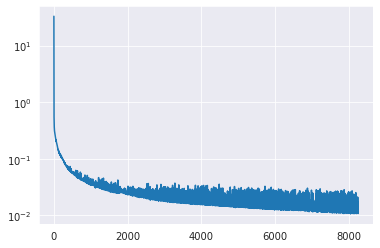

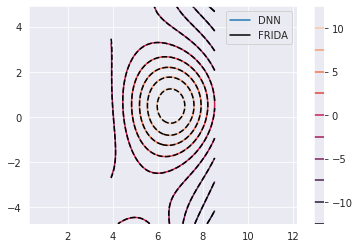

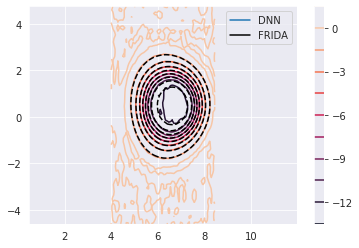

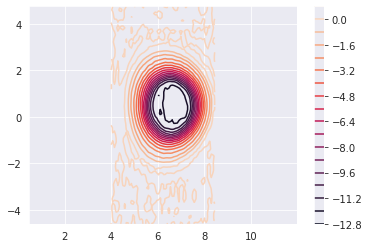

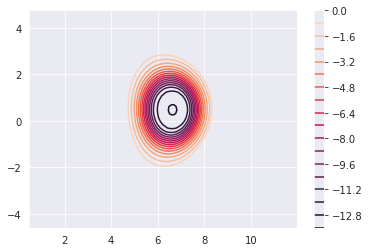

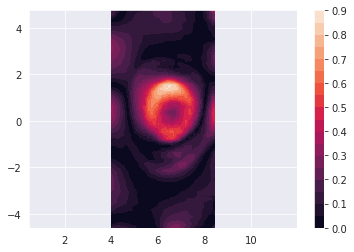

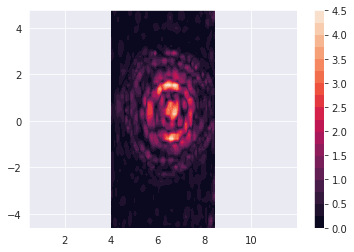

In [ ]:
 plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')

history_bkp = history

ind_plot = 2900
qq_ref = y_train[ind_plot,:,:].numpy()
qq_NN = np.squeeze(model(X_train[ind_plot:ind_plot+1,:]).numpy())
RHS_ref = res_RHS_pixel_train[ind_plot,:,:].numpy()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# sur1 = ax.contour(RR_pixels,ZZ_pixels, qq_ref, 10, cmap=cm.coolwarm,
#                         linewidth=0, antialiased=False)
# surf2 = ax.contour(RR_pixels,ZZ_pixels, qq_NN, 10, colors = 'black', linestyles = 'dashed',
#                         linewidth=0, antialiased=False)





# prediction = model(x_ds)
# loss = loss_fun_all(y_ds,prediction,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
# loss_fun_MSE(y_ds, model(x_ds)).numpy()
# loss_fun_PDE(y_ds, model(x_ds),RHS_in_ds).numpy()



f1 = tf.expand_dims(tf.expand_dims(qq_NN,axis = 0),axis = -1)
f2 = tf.expand_dims(tf.expand_dims(qq_ref,axis = 0),axis = -1)
# f2 = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = -1)
# GS_ope_ref = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = 0)

# psi_conv = fun_GS_Jacobi_conv_batch(f1,f2)
GS_ope, jphi = fun_GSoperator_conv_batch(f1)
GS_ope_ref = fun_GSoperator_NN_conv_batch(f2)
GS_ope_ref = RHS_ref[1:-1,1:-1]

GS_ope = fun_GSoperator_NN_conv_smooth_batch(f1)

fun_contour_compare_sol(qq_ref,qq_NN,RR_pixels,ZZ_pixels)
fun_contour_compare_sol(GS_ope_ref[:,:],GS_ope[0,:,:],RR_in,ZZ_in)


fun_contour_sol(GS_ope[0,:,:],RR_in,ZZ_in)
fun_contour_sol(GS_ope_ref[:,:],RR_in,ZZ_in)

fun_contourf_sol(100*np.abs(qq_ref[1:-1,1:-1] - qq_NN[1:-1,1:-1])/np.max(np.abs(qq_ref[1:-1,1:-1])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

fun_contourf_sol(100*np.abs(GS_ope_ref[:,:] - GS_ope[0,:,:])/np.max(np.abs(GS_ope_ref[:,:])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])